# A/B TESTING: Does Changing website From Light Theme to Dark Theme impact Business Metrics?

In [239]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.stats.api as sms

In [227]:
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
from statsmodels.stats.power import TTestIndPower, GofChisquarePower

## **A/B Testing**  
This method is for testing which Theme, Light or Dark, performs better on a metric that is continuous.   

### Step 1: Problem Statement

Assuming a client wants to test which of the two Themes, Light theme and Dark theme for their website will perform better on Click Through Rate

Light theme which is the default is showed to a random group of users. This is the control group  
Dark theme is showed to another random group. And this the treatment/testing group  

The independent variable is Theme. We wan to know what the outcome of a chosen metric will be based on the type of Theme.  
The dependent variable will be the chosen metric. This is what we are trying to measure

### Step 2: Define Hypothesis

The hypothesis is defined as:  

Null Hypothesis (Ho): Changing Light theme to Dark theme results in no significant impact on Click Through Rate  

Alternate Hypothesis (Ha): there is a significant impact on Click Through Rate

In the case we reject the null hypothesis and the impact is positive (increased metric value), the theme will be changed

### Step 3: Design the Experiment  

- _Define key metric_: metrics in this case: Click Through Rate

- _Define specifications for the experiment_:  

**Sample Size**: Number of observations required to achieve an impact, if there is an impact at all.  
**Duration** : How long will it take to achieve an impact, if there is an impact at all  

**Effect Size**: is the magnitude of the impact, if there is any at all.  
                Conventionally, large impact = 0.8, medium impact = 0.5, small impact = 0.2

**MDE (Minimum Detectable Effect, delta)**: is the least difference in the chosen metric between control and treatment groups we care about detecting from a business perspective.   

**Significance Level (alpha)**: probability of being off if the null hypothesis is true.  
In this case the probalbility of detecting conventionally alpha = 0.05  

**power**: Probability of detecting an effect if the alternate hypothesis is true. conventionally power = 0.8

### Step 4: Run the Experiment

**a. Power Analysis: estimate sample size per group**  

It is based on 4 variables namely, Effect Size, Sample Size, Significance Level & Power.  
It is used to determine the value of Sample Size, assuming the rest of the variables are known   

It is required to find the number of users needed by each group to achieve the chosen MDE

In [ ]:
# # estimate required sample size for a chi squared test
# chi_square_power = GofChiSquarePower()
# sample_size = np.ceil(chi_square_power.solve_power(
#     effect_size=effect_size,
#     alpha=alpha,
#     power=power
# ))

# print(f"Estimated Sample size: {sample_size}")

This standardized effect size (referred to as Cohen's d) is a unit-free measure that allows you to compare the magnitude of an effect across the metric, even if they are on different scales  

In [201]:
# define specifications
alpha = .05
power = .8
delta = .18    #assuming MDE of 18%
ratio = 1   # assume equal group sizes for dark and light themes

In [202]:
# estimate sample size for the test
power_analysis = TTestIndPower()

n = power_analysis.solve_power(effect_size=delta,
                                         alpha=alpha,
                                         power=power)
sample_size = np.ceil(n)

In [203]:
print(f'Estimated Sample size per group: {np.ceil(sample_size)}.\n'
      f'This is the least number of users required to carry out the experiment for each Theme type')

Estimated Sample size per group: 486.0.
This is the least number of users required to carry out the experiment for each Theme type


Our business representatives want to see that at least Dark Theme impacts CTR by 18%  over Light Theme before the website's theme is changed.  

Next step will be setting up experiment to collect the data on the Themes.
From the Power Test we will need at least 486 users for each group to test this.  
The users must be unique and randomly selected, as it is a prerequisite for testing

**b. Collect & Prepare the Data for the Experiment**  

- Usually at this point you would work with your team to set up the two themes on the website. Each Theme will be shown to a random group of users, until the estimated sample size is achieved. The data will be collected  

- We will assume the data has been collected. Since our required sample size is predetermined both themes must have the same sample size and observations must be random.  

- Random Sampling eliminates bias. This is good because we want the results of the A/B test to be representative of the entire population of users rather than the sample itself

In [204]:
# load data
data = pd.read_csv('./hypothesis_testing/website_ab_test.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [ ]:
# check for duplicated observations
data.duplicated().sum()

np.int64(0)

In [ ]:
# random sample of light theme users (control group)
control_group = data[data['Theme'] == 'Light Theme'].sample(n=int(sample_size),
                                                            random_state=0)
control_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 20 to 306
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               486 non-null    object 
 1   Click Through Rate  486 non-null    float64
 2   Conversion Rate     486 non-null    float64
 3   Bounce Rate         486 non-null    float64
 4   Scroll_Depth        486 non-null    float64
 5   Age                 486 non-null    int64  
 6   Location            486 non-null    object 
 7   Session_Duration    486 non-null    int64  
 8   Purchases           486 non-null    object 
 9   Added_to_Cart       486 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 41.8+ KB


In [207]:
# random sample of dark theme users (treatment group)
treatment_group = data[data['Theme'] == 'Dark Theme'].sample(n=int(sample_size),
                                                            random_state=0)
treatment_group.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486 entries, 582 to 506
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               486 non-null    object 
 1   Click Through Rate  486 non-null    float64
 2   Conversion Rate     486 non-null    float64
 3   Bounce Rate         486 non-null    float64
 4   Scroll_Depth        486 non-null    float64
 5   Age                 486 non-null    int64  
 6   Location            486 non-null    object 
 7   Session_Duration    486 non-null    int64  
 8   Purchases           486 non-null    object 
 9   Added_to_Cart       486 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 41.8+ KB


In [258]:
# reset index
control_group.reset_index(drop=True, inplace=True)

treatment_group.reset_index(drop=True, inplace=True)

In [219]:
# join control & treatment groups into one dataframe
ab_test = pd.concat([control_group, treatment_group], axis=0)
ab_test.reset_index(drop=True, inplace=True)
ab_test.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.274706,0.200325,0.524075,64.618741,36,Bangalore,72,No,Yes
1,Light Theme,0.153946,0.302460,0.612945,62.397559,22,Chennai,1677,Yes,No
2,Light Theme,0.255670,0.013316,0.405900,40.648417,22,New Delhi,837,Yes,Yes
3,Light Theme,0.422875,0.016021,0.770185,40.596282,43,Chennai,351,No,Yes
4,Light Theme,0.110167,0.345370,0.514572,34.091682,52,Kolkata,120,Yes,Yes


**c. Data Analysis & Viz: understand the data**  

We analyze the distribution of Click Through Rate between Dark Theme and Light Theme

In [224]:
ab_test.groupby('Theme')['Click Through Rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Theme,,,,,,,,
Dark Theme,486.0,0.264747,0.141189,0.016901,0.143243,0.276748,0.382541,0.499989
Light Theme,486.0,0.247109,0.137157,0.010767,0.139769,0.236563,0.353777,0.499328


Dark Theme appears to have a higher mean. Indicating it resulted in users clicking more  than Light Theme users.  


In [220]:
# define colors to use for plotting
palette = {'Dark Theme': 'yellow', 'Light Theme': 'gray'}

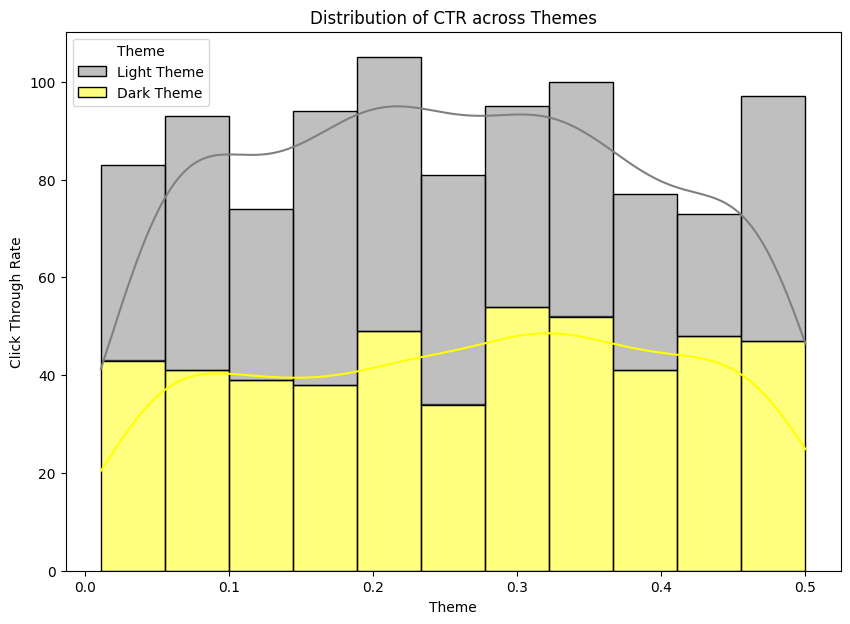

In [225]:
# plot distribution CTR for the two themes
plt.figure(figsize=(10,7))
ax = sns.histplot(data=ab_test, x='Click Through Rate', hue='Theme', multiple='stack', kde=True, palette=palette)
ax.set_title('Distribution of CTR across Themes')
ax.set_xlabel('Theme')
ax.set_ylabel('Click Through Rate')

plt.show()

Both themes show a significant overlap across range of CTR values.  
Suggesting for many users, theme might not have drastic different on their CTR

Light Theme appear to be generally taller in lower CTR ranges (0.0 to 0.2).  
Indicating higher frequency of Light Theme users show lower Click Through Rate  

Conversely Dark Theme appears taller in higher CTR ranges (0.2 to 0.4)
Indicating higher frequency of Dark Theme users show relatively higher Click Through Rate

C:\Users\o.01\AppData\Local\Temp\ipykernel_24684\708918901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Theme', y='Click Through Rate', data=ab_test, palette=palette)


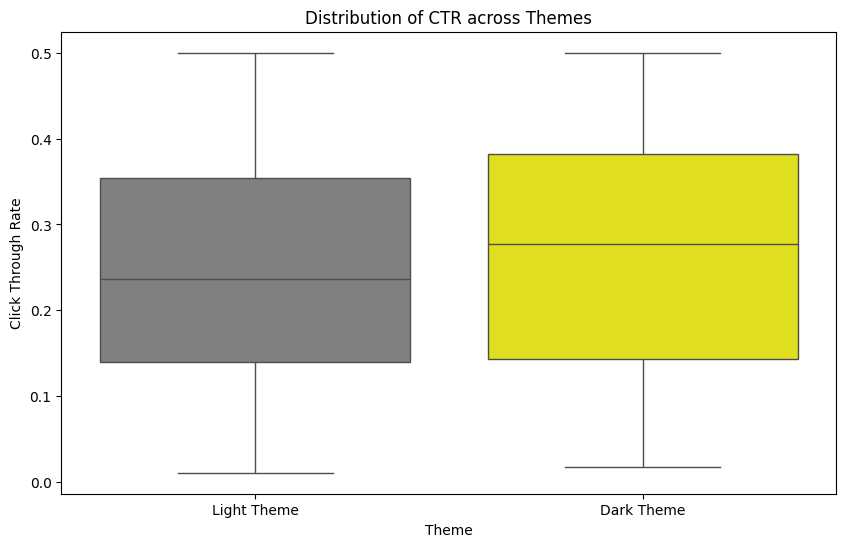

In [226]:
# boxplot: CTR for the two themes
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Theme', y='Click Through Rate', data=ab_test, palette=palette)
ax.set_title('Distribution of CTR across Themes')
ax.set_xlabel('Theme')
ax.set_ylabel('Click Through Rate')
plt.show()

The median (horizontal line inside the box) of Dark Theme appears to be slight higher than that of Light Theme.  
We can conclude users exposed to Dark theme click more often than users on Light Theme.  

The IQR (middle 50% of the data) for Dark Theme is slightly wider than for Light Theme.  
Meaning the middle 50% of Dark Theme users exhibit a higher variability than that of Light Theme.  

This visual summary suggests a potential positive impact of the Dark Theme on the median CTR


**d. Testing the Hypothesis: is the difference in Themes statistically significant?**  

We will use a two sample t-test to determine whether the observed difference between Dark Theme and Light Theme.  
That is, will there be an impact on CTR if we change Light Theme to Dark Theme?

In [228]:
# function for performing two sample t-test on the numeric columns
def perform_t_test(data, variable, alpha=.05):
    """
    Performs two sample t-test on the specified variable from the dataset for the Themes, Light theme and Dark theme.

    Args:
         data: the dataset for performing the test procedure.
         variable: the specified variable for the test to be performed on for the two groups
         alpha: the level of significance for the test

    Return:
        conclusion on whether the test was significant.
    """
    # get the values of a specified variable for both themes
    control_group = data[data['Theme'] == 'Light Theme'][variable]
    treatment_group = data[data['Theme'] == 'Dark Theme'][variable]
    
    # perform two sample t-test
    test_statistic, p_value = ttest_ind(control_group, treatment_group, equal_var=False)

    # compare p-value with level of significance(α)
    if p_value <= alpha:
        print(
            f"Test Statistic: {test_statistic}.\n"
            f"p_value: {p_value}.\n\n"
            f"Reject the null hypothesis.\n"
            f"With a p-value of {p_value:.4f} (less than {alpha}), there is convincing evidence\n"
            f"that a statistically significant difference exists in '{variable}'\n"
            f"between the Light Theme and Dark Theme.\n"
        )
    else:
        print(
            f"Test Statistic: {test_statistic}.\n"
            f"p_value: {p_value}.\n\n"
            f"Fail to reject the null hypothesis.\n"
            f"Since the p-value of {p_value:.4f} is greater than the alpha value of {alpha},\n"
            f"there is not enough evidence to conclude that a statistically significant\n"
            f"difference exists in '{variable}' between the Light Theme and Dark Theme.\n"
        )

In [229]:
# test hypothesis
perform_t_test(ab_test, 'Click Through Rate')

Test Statistic: -1.9753735216804147.
p_value: 0.04850914941754544.

Reject the null hypothesis.
With a p-value of 0.0485 (less than 0.05), there is convincing evidence
that a statistically significant difference exists in 'Click Through Rate'
between the Light Theme and Dark Theme.



In [ ]:
# return effect size (Cohen's d)
control_group_mean = control_group['Click Through Rate'].mean()
treatment_group_mean = treatment_group['Click Through Rate'].mean()     # mean CTR for themes

expected_increase = treatment_group_mean - control_group_mean

effect_size = expected_increase / (ab_test['Conversion Rate'].std())
effect_size

np.float64(0.12676233829504047)

**e. Confidence Interval**  

The confidence interval is the range  of values within which the true difference in Themes is likely to lie at a given confidence level.  
Conventionally, confidence level = 95%  

If the range of the confidence interval falls above the MDE (the least effect we expect to see), at the specified confidence level, it supports the test is **practically significant.**   
In this case it strengthens the case for changing From Light Theme to Dark Theme.  
The interval will not contain zero(0) in this case.  


If it does contain zero, we cannot rule out the possibility that there is no real difference between the Themes for CTR.

In [ ]:
def confidence_interval(group_1, group_2, confidence_level=0.95):
    """
    Calculates the confidence interval for the difference in means between Light Theme and Dark Theme

    Args:
        group_1 (pd.Series): Data for the first group.
        group_2 (pd.Series): Data for the second group.
        confidence_level (float, optional): The desired confidence level. Defaults to 0.95.

    Returns:
        tuple: A tuple containing the lower and upper bounds of the confidence
               interval for the difference in means
    """
    mean1 = np.mean(group_1)
    mean2 = np.mean(group_2)
    mean_difference = abs(mean1 - mean2)

    std1 = np.std(group_1, ddof=1)  # Sample standard deviation
    std2 = np.std(group_2, ddof=1)

    n1 = len(group_1)
    n2 = len(group_2)

    # Calculate the standard error 
    standard_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

    # Degrees of freedom
    v1 = std1**2 / n1
    v2 = std2**2 / n2
    dof = np.floor(((v1 + v2)**2)/((v1**2/(n1-1)) + (v2**2/(n2-1))))

    # Calculate the t-statistic for the given confidence level
    alpha = 1 - confidence_level
    t_critical = stats.t.ppf(1 - (alpha / 2), df=dof)

    # Calculate the margin of error
    margin_of_error = t_critical * standard_error

    lower_boundary = mean_difference - margin_of_error
    upper_boundary = mean_difference + margin_of_error

    # Calculate the confidence interval
    confidence_interval = (lower_boundary, upper_boundary)

    print(f"We are 95% confident that the true mean difference in CTR between Light and Dark Themes\n"
          f"lie between {round(confidence_interval[0], 4)} and {round(confidence_interval[1], 4)}")

In [291]:
confidence_interval(control_group['Click Through Rate'], treatment_group['Click Through Rate'])

We are 95% confident that the true increase in CTR with the Dark Theme

lies between 0.0001 and 0.0352


The mean difference between Light Theme and Dark Theme falls within the confidence interval.  
Also the entire interval does not contain zero.  
All suggesting that the Dark Theme likely does lead to a slightly higher average CTR than the Light Theme, supporting the test was **statistically significant**

### Step 3: Interpret results

In [238]:
# what effect size would be if the mean difference was equal to the MDE=0.18
corresponding_eff_size_to_mde = delta / (ab_test['Conversion Rate'].std())
corresponding_eff_size_to_mde

np.float64(1.2936508499180543)

**Conclusion**  

An effect size of 0.127 falls into the **small effect** cateogry (|d| < 0.2).  
While the difference between Themes is statistically significant for CTR, the magnitude of the difference is relatively small  

Furthermore, the observed effect (0.127) is much smaller than the effect size representing the pre-defined
MDE(0.1294).  

The entire confidence interval (0.0001157 to 0.035160) does not fall above the MDE=0.18. Which would have validated the **practical significance** of the test.

While the test was statistically significant, the effect doesn't appear to be practically significant based on the initial MDE(.18)


**Next Steps...**

is to carefully consider whether this small lift in CTR is practically significant for the business goals.  
The following points must be considered  

- **Magnitude of the Lift:**  
The current effect size translates to a relatively small increase in CTR.  
To understand the real-world impact, consider the absolute difference in means which was approximately 0.018.  
With the help of business reps, we will need to assess if this 1.8% lift in CTR is substantial enough to justify a switch to the Dark Theme.  

- **Cost of Implementation:**  
With this small lift in CTR, We have to consider if the cost of changing to Dark Theme might outweigh the benefit.  
With collaboration with the business reps if it turns out to outweigh the benefit, the default theme will be kept.  

- **Long-Term Impact:**  
We will need a reason to believe this small increase in CTR will be sustained over time.  
Else it won't be worth changing themes.

- **Impact on Other Metrics:**  
We will have to analyze if the Dark Theme had any positive or negative impact on other key metrics.  
A small gain in CTR might not be worth it if it significantly hurts other important user behaviors.